In [69]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [70]:
path_train = "Resources/datasets_137197_325031_train_u6lujuX_CVtuZ9i.csv"
path_test = "Resources/datasets_137197_325031_test_Y3wMUE5_7gLdaTN.csv"



In [71]:
train_df = pd.read_csv(path_train)
test_df = pd.read_csv(path_test)
train_df['which_data'] = 'data_train'
test_df['which_data'] = 'data_test'

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
which_data           614 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 67.2+ KB


In [72]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
which_data           367 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 37.4+ KB


In [73]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [74]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
which_data           614 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 67.2+ KB


In [75]:
train_df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [76]:
# data = pd.concat([train_df,test_df], axis=0,sort=False)
# data = data.drop(columns = ['Loan_ID'])
# data.to_csv('data_all')

In [77]:
data.shape

(981, 13)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
Gender               957 non-null object
Married              978 non-null object
Dependents           956 non-null object
Education            981 non-null object
Self_Employed        926 non-null object
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Credit_History       902 non-null float64
Property_Area        981 non-null object
Loan_Status          614 non-null object
which_data           981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [79]:
data.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,which_data
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,data_train
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,data_train
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,data_train
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,data_train
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,data_train


In [81]:
dependent_dict = {'0':0,'1':1,'2':2,'3+':3}
data['Dependents'] = data['Dependents'].map(dependent_dict)
data = pd.concat([train_df,test_df], axis=0,sort=False)
data = data.drop(columns = ['Loan_ID'])
data.to_csv('data_all1')

In [20]:
data['Dependents'].value_counts().values

array([545, 160, 160,  91])

In [38]:
catagorical_features = ['Gender','Married','Education','Self_Employed','Loan_Amount_Term','Credit_History',
                        'Property_Area','Loan_Status']
numerical_features = ['Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

1
Index(['Male', 'Female'], dtype='object')
2
Index(['Yes', 'No'], dtype='object')
3
Index(['Graduate', 'Not Graduate'], dtype='object')
4
Index(['No', 'Yes'], dtype='object')
5
Float64Index([360.0, 180.0, 480.0, 300.0, 240.0, 84.0, 120.0, 36.0, 60.0, 12.0,
              350.0, 6.0],
             dtype='float64')
6
Float64Index([1.0, 0.0], dtype='float64')
7
Index(['Semiurban', 'Urban', 'Rural'], dtype='object')
8
Index(['Y', 'N'], dtype='object')


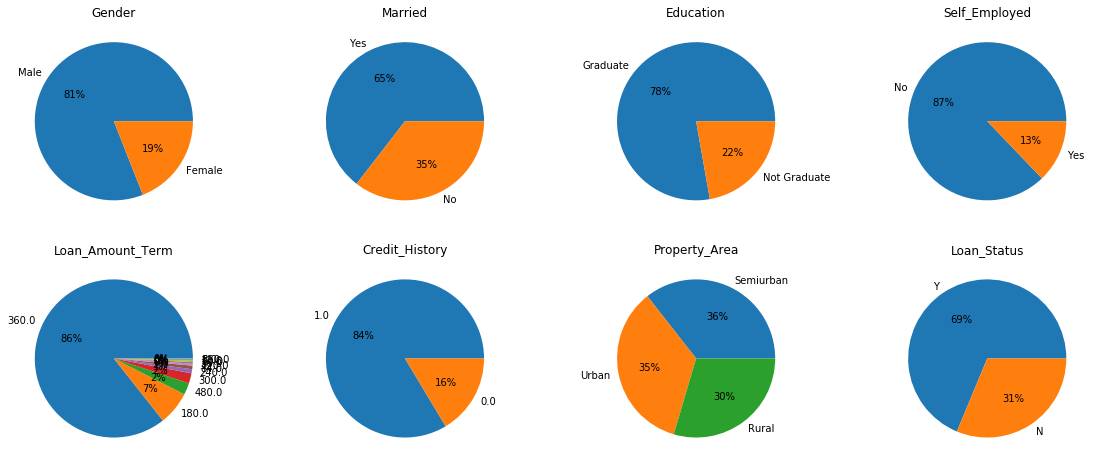

In [52]:
plt.figure(figsize=(20,8))
for index ,col in enumerate(catagorical_features,start =1):
    print(index)
    plt.subplot(2,4,index)
    plt.title(col)
    print(data[col].value_counts().keys())
    plt.pie(data[col].value_counts().values ,autopct='%1.0f%%', labels=data[col].value_counts().keys())
#     plt.tight_layout()



In [ ]:
# Most people are male
# Most people are married
# Most people are graduated
# Most people have jobs 
# Most people credit history is 1
# Most people get loan



Float64Index([0.0, 2.0, 1.0, 3.0], dtype='float64')
Float64Index([0.0, 2.0, 1.0, 3.0], dtype='float64')


ValueError: cannot convert float NaN to integer

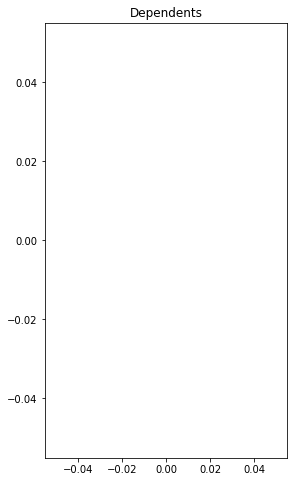

In [57]:
plt.figure(figsize=(20,8))
for index, col in enumerate(numerical_features, start = 1):
    plt.subplot(1,4,index)
    plt.title(col)
    print(data[col].value_counts().keys())
    print(data[col].value_counts().index)
    sns.distplot(data[col], kde_kws={'bw':0.1})

    